# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer

# Loading the data

In [2]:
df=pd.read_csv("C:/Users/Ehtesham/OneDrive/Desktop/EV Market/EV_Dataset.csv")

# Viewing and cleaning the data

In [3]:
df.shape

(96845, 8)

In [4]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [7]:
# Checking for null values

print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [8]:
# Convert dates to proper datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Exploratory Data Analysis And Visualization

In [9]:
print(df['EV_Sales_Quantity'].describe())

count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64


<AxesSubplot:ylabel='Vehicle_Category'>

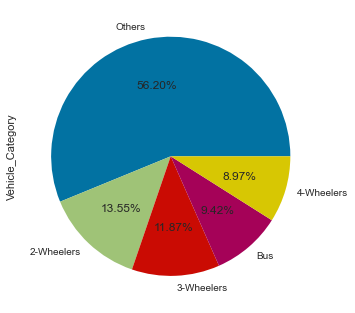

In [10]:
# Plotting EV quantity by vehicle category

df['Vehicle_Category'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')

<AxesSubplot:>

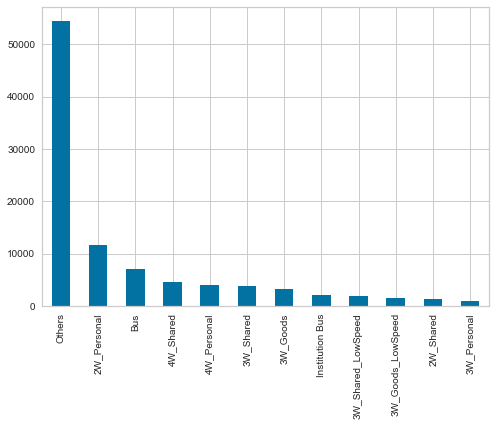

In [11]:
# plotting EV quantity by vehicle type

df['Vehicle_Type'].value_counts().plot(kind = 'bar')

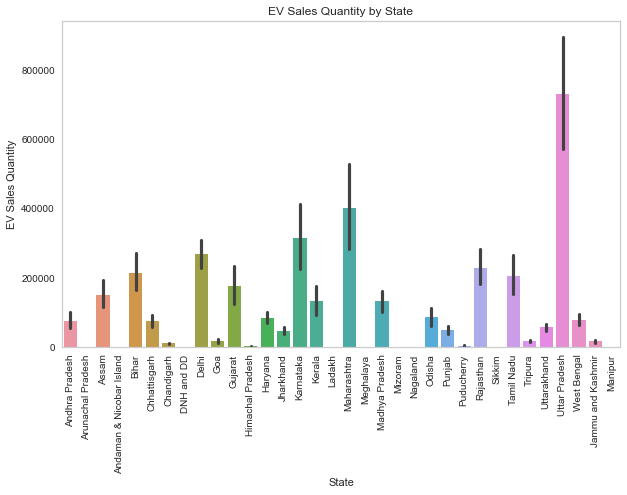

In [12]:
# Plotting EV sales quantity by state

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='State', y='EV_Sales_Quantity', estimator=sum)
plt.title('EV Sales Quantity by State')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

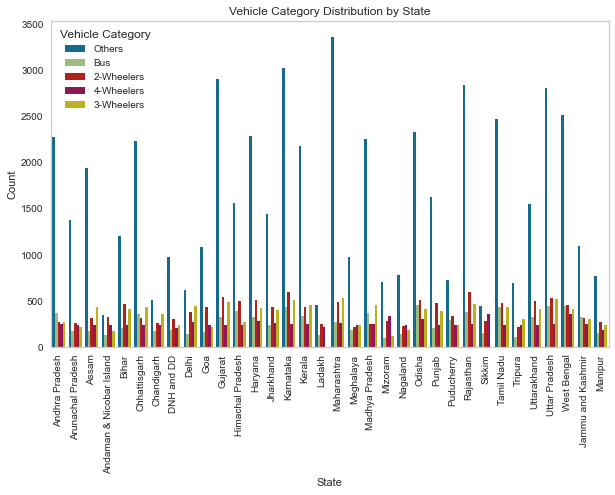

In [13]:
# Plotting EV category statewise

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', hue='Vehicle_Category')
plt.title('Vehicle Category Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Category')
plt.grid(axis='y')
plt.show()

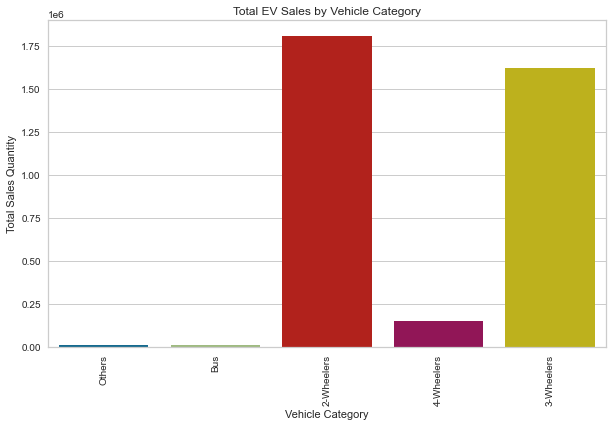

In [14]:
# Plotting Total EV Sales by vehicle category

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', estimator=sum, ci=None)
plt.title('Total EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=90)
plt.show()

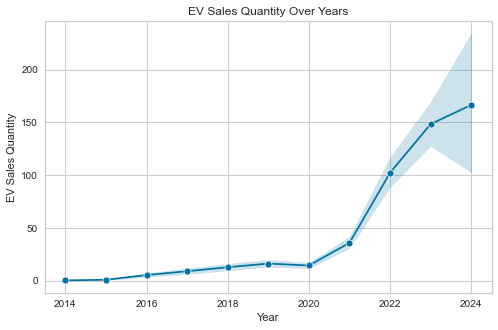

In [15]:
# Plotting Total EV Sales over the years

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('EV Sales Quantity Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.show()

# Principal Component Analysis

In [16]:
categorical_columns = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']

label_encoders = {}

for col in categorical_columns:

    le = LabelEncoder()

    df[col] = le.fit_transform(df[col])

    label_encoders[col] = le

In [17]:
features = df[['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [18]:
# Applying PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2',])

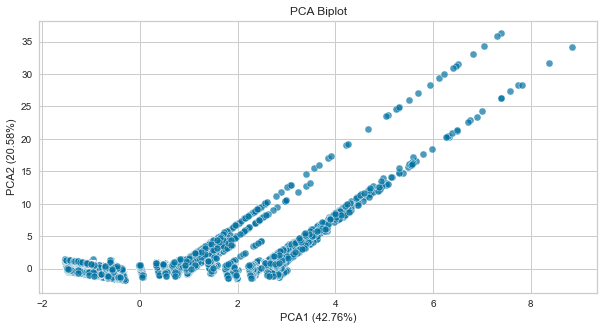

In [19]:
# PCA Biplot

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7, s=50)
plt.xlabel(f'PCA1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PCA2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

# K-Means Clsutering

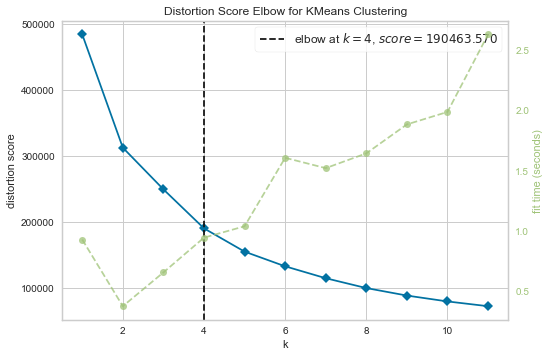

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# We are using Elbow method to determine best no of clusters in K-means clustering

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(features_scaled)
visualizer.show()

Cluster Labels for States: 1    23
3     7
0     3
2     1
Name: cluster_num, dtype: int64
Inertia: 42753651060.31883
Iterations: 3


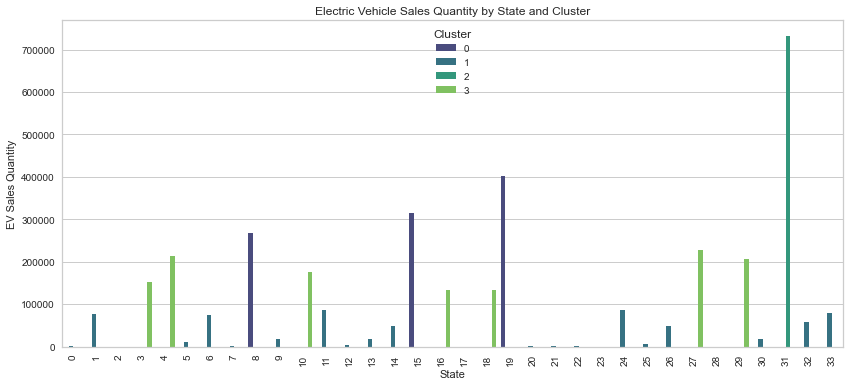

In [21]:
# Group by State and aggregate Electric_Vehicle_Sales_Quantity

state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()


# Perform K-means clustering on aggregated EV sales quantity by state

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
state_sales['cluster_num'] = kmeans.fit_predict(state_sales[['EV_Sales_Quantity']])

# Print cluster assignments

print("Cluster Labels for States:", state_sales['cluster_num'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

# Plot the clustered states by sales quantity

plt.figure(figsize=(14, 6))
sns.barplot(data=state_sales, x='State', y='EV_Sales_Quantity', hue='cluster_num', palette='viridis')
plt.xticks(rotation=90)
plt.title('Electric Vehicle Sales Quantity by State and Cluster')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()


In [22]:
# Calculating mean EV sales for each cluster

cluster_summary = state_sales.groupby('cluster_num')['EV_Sales_Quantity'].mean().reset_index()
print(cluster_summary)

   cluster_num  EV_Sales_Quantity
0            0      328523.666667
1            1       27485.565217
2            2      732074.000000
3            3      177714.000000
